In [1]:
import numpy as np
from matplotlib import pyplot as plt
#plt.style.use('QT4Agg')
%matplotlib widget

from utils.plots import tinyprobe_visualize
from utils.wall_processing import MModeDist
from utils.doppler import DopplerSignal 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


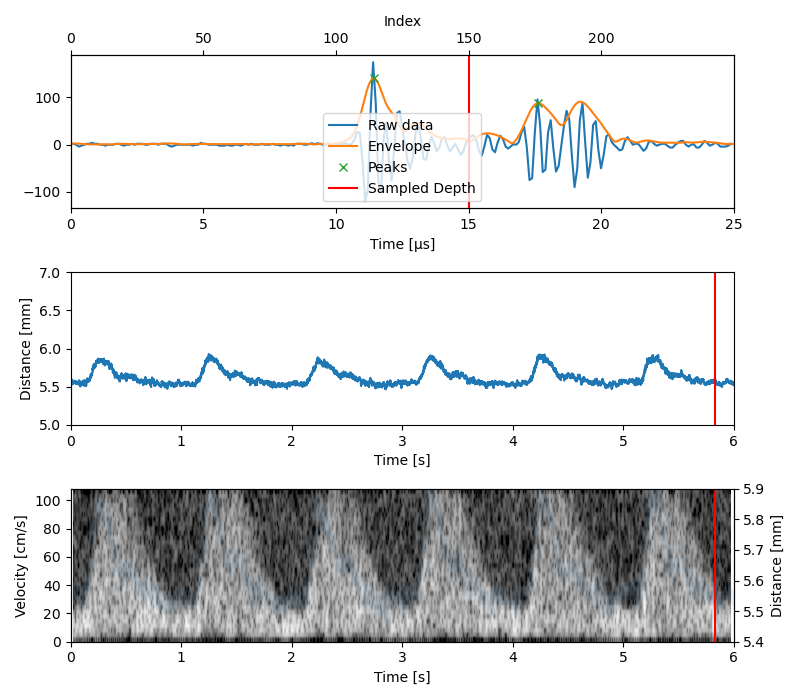

In [2]:
def get_raw(file_name):
    data_file = np.load(file_name)
    return data_file

channel = 1
#data_path = f"TinyProbe_data4_4.4.2024/7.npy"
data_path = f"Example_TinyProbe_data4_5.5.2024/1.npy"
data = get_raw(data_path)[:,channel,100:350].T
"""fs = 10e6
f_acq = 1e3
f_us = 2.25e6
c = 1_800
frame = 4000
depth = 241
theta_deg=41.41"""

fs = 10e6
f_acq = 1.4e3
f_us = 2.25e6
c = 1_800
frame = int(5834*1.4)+1
depth = 150
theta_deg=75
plt.close("all")
fig, axs = plt.subplots(3,figsize=(8,7))


#m-mode
dist= MModeDist(data,f_0=f_us,fs=fs,axis_signal=0,
                f_margins=(1.8,1.4),interpol=15,fps=f_acq,c=c)
dist.plot_peak_loc(idx=frame,ax=axs[0])
axs[0].axvline(x=depth/fs*1e6,color='r',label="Sampled Depth")
axs[0].set_xlabel('Time [μs]')
axs[0].set_xlim(0,data.shape[0]/fs*1e6)
#add index label
ax_idx = axs[0].twiny()
ax_idx.set_xlim(0,data.shape[0]/fs*1e6)
idx_ticks = np.arange(0,data.shape[0],50)
new_tick_locations = idx_ticks/fs*1e6
ax_idx.set_xticks(new_tick_locations,idx_ticks)
ax_idx.set_xlabel("Index")
ax_idx.grid(False)
axs[0].legend(loc="best")

dist.plot_dist(ax=axs[1])
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel("Distance [mm]")
axs[1].set_ylim(5,7)
#doppler
doppler = DopplerSignal(data,f_0=f_us,fs=fs,axis_signal=0,
                        prf=f_acq,theta_deg=theta_deg,c=c,
                        f_wall=30)
doppler.plot_spectrum(depth,vmax=None,vmin=-48,ax=axs[2],i_q_type="forward")
axs[1].axvline(x=frame/f_acq,color='r')
axs[2].axvline(x=frame/f_acq,color='r')
axs[2].grid(False)
axs[1].sharex(axs[2])
axs[1].set_xlim(0,data.shape[1]/f_acq)
axs[2].set_xlabel('Time [s]')
axs[2].set_ylabel("Velocity [cm/s]")

ax_mmode2 = axs[2].twinx()
dist.plot_dist(ax=ax_mmode2,alpha=.1)
ax_mmode2.set_xlabel('Time [s]')
ax_mmode2.set_ylabel("Distance [mm]")
ax_mmode2.set_ylim(5.4,5.9)
ax_mmode2.grid(False)

plt.tight_layout()

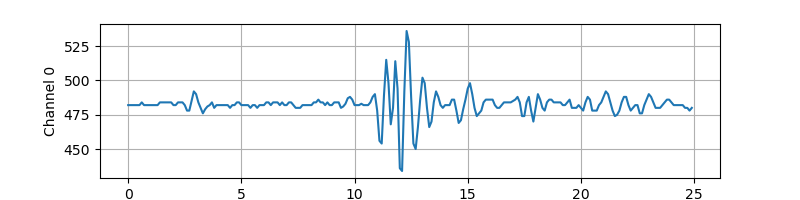

interactive(children=(IntSlider(value=0, description='frame', max=8399), Output()), _dom_classes=('widget-inte…

(0.0, 1024.0)

In [3]:
figTP =plt.figure(2,figsize=(8,2))
tinyprobe_visualize(np.expand_dims(data[:,:].T,axis=1),FPS=f_acq,fs=fs,fig=figTP)
plt.ylim(0,2**10
        )


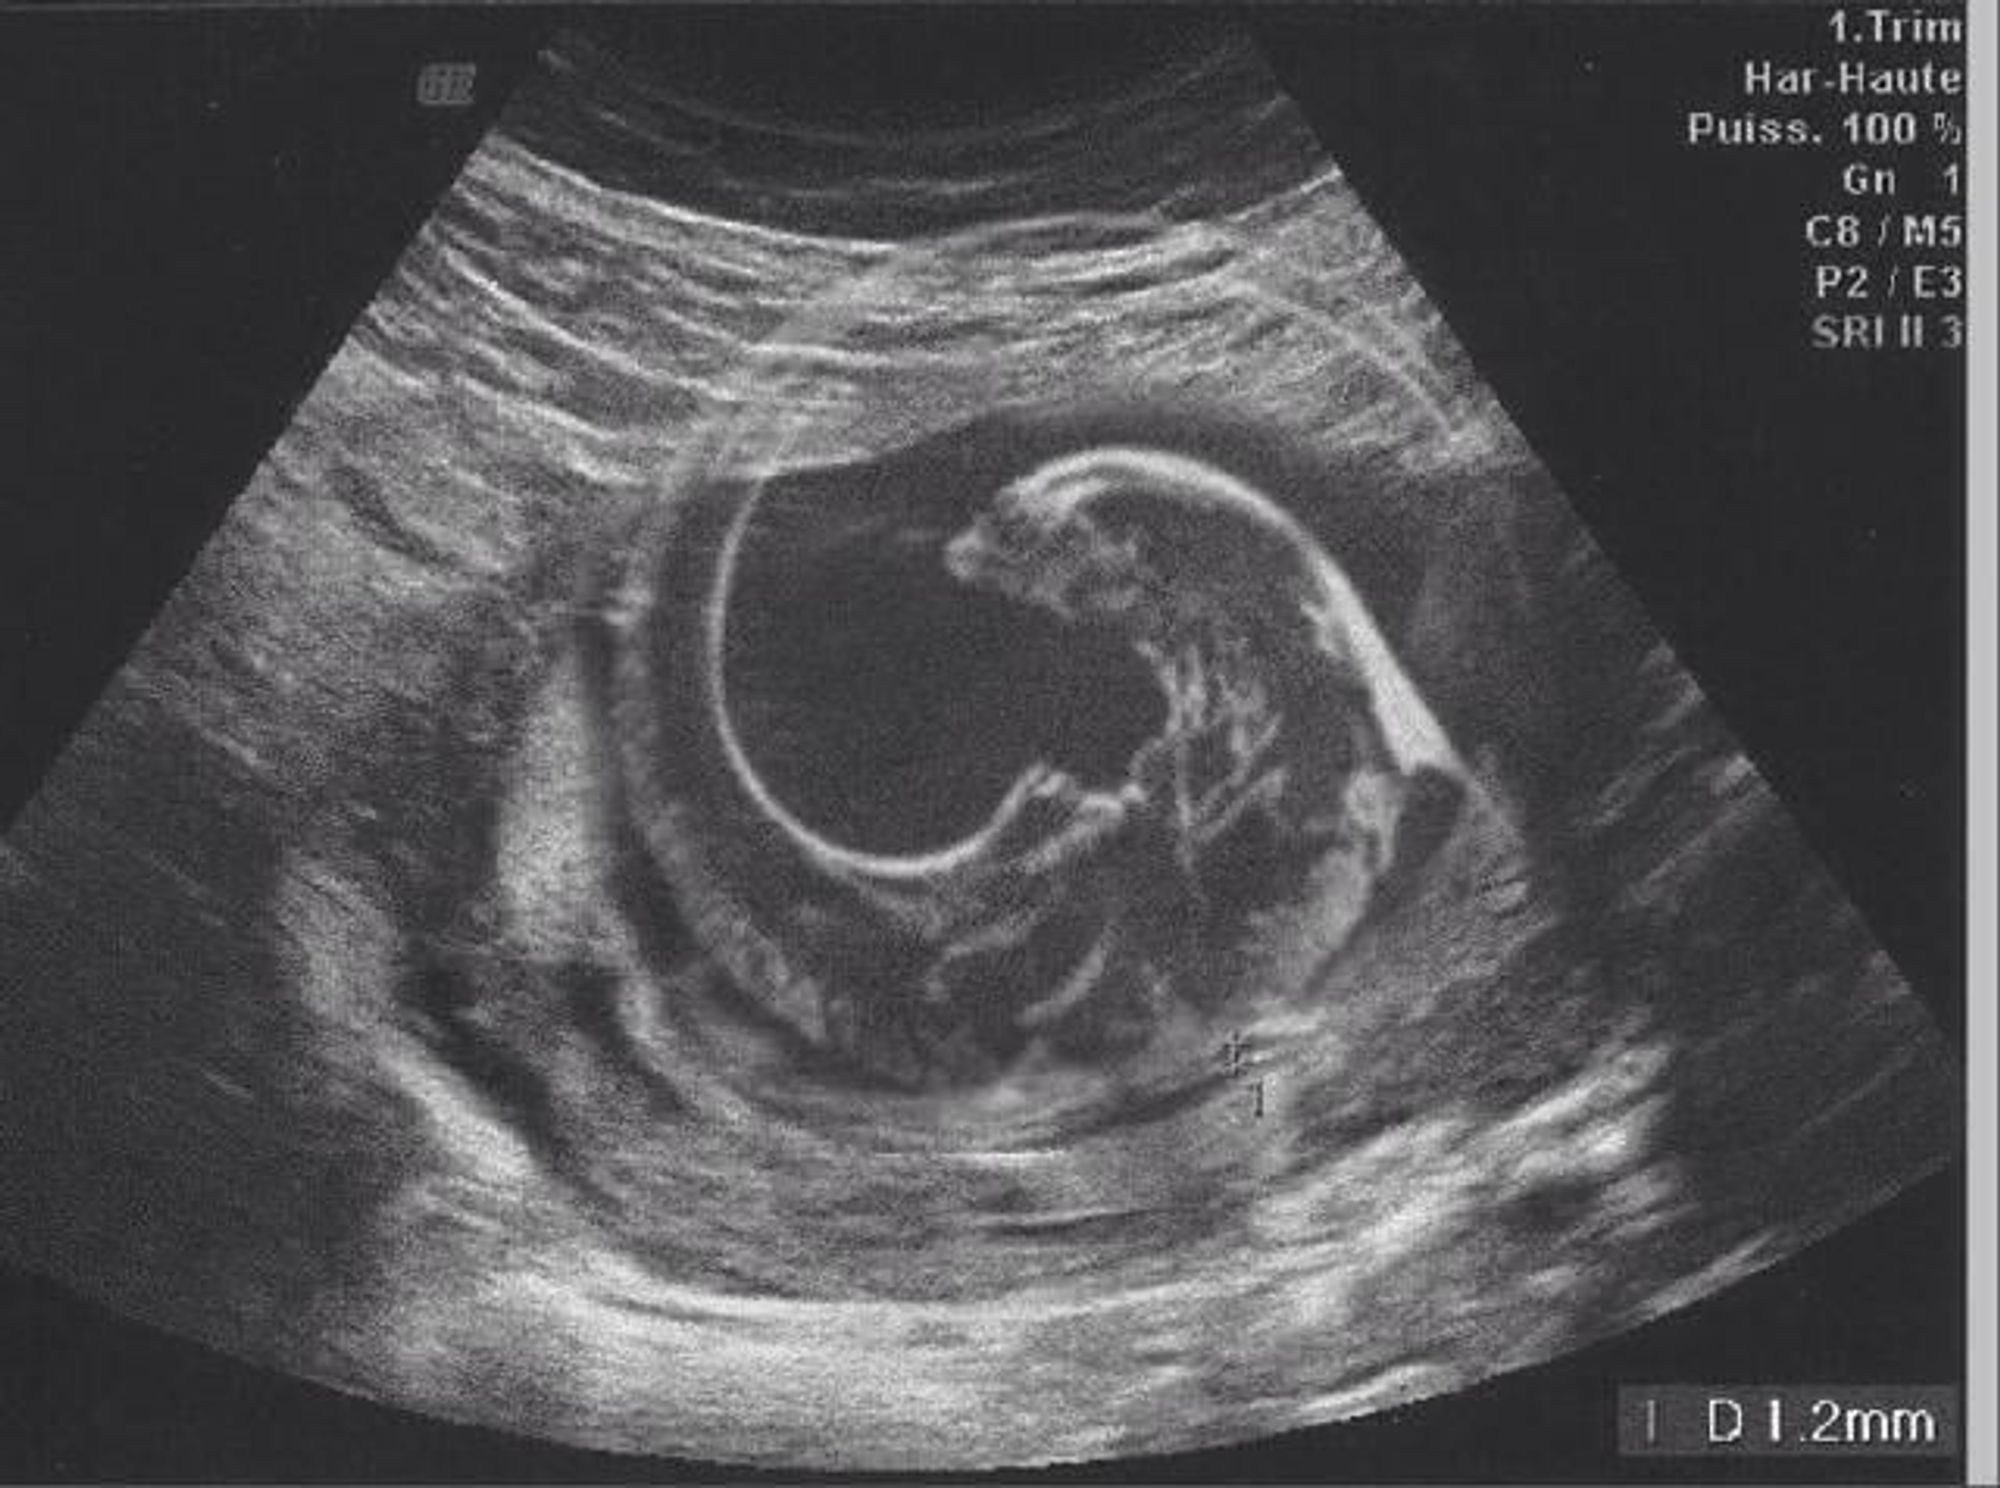

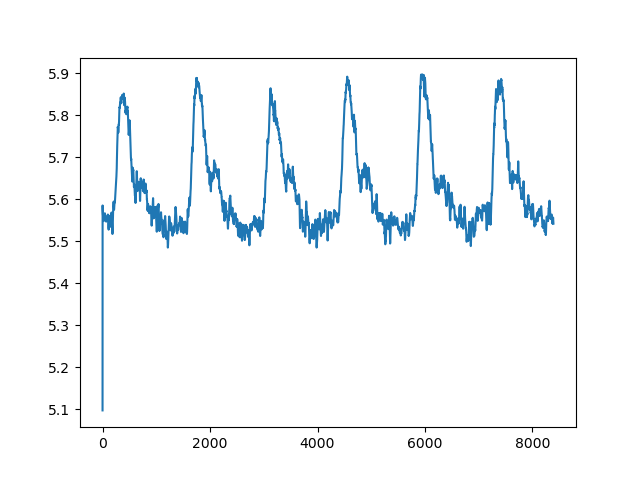

In [4]:
plt.close("all")
mmode = dist.distance_processing(height_threashold=0)
t_mmode= np.arange(mmode.data.shape[-1])/dist.fps
plt.plot(np.convolve(mmode,np.ones(10)/10, mode='valid'))

In [5]:
with open('mmode_1.npy', 'wb') as f:
    np.save(f, mmode)
    np.save(f, t_mmode)
    

In [6]:
doppler.fd_to_v_ratio

647.0476127563019

In [7]:
1/(512/1.4e3)/doppler.fd_to_v_ratio*100

0.4225925490014674